In [1]:
from scipy import *
from numpy import *
from matplotlib import *
from matplotlib.pyplot import *
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy.fft as fft
import numpy as np

In [79]:
## define arrays
N = 256
dx, dy = 0.1, 0.1

L = N*dx  # /2
x1 = np.linspace(-L/2, L/2, N)
y1 = np.linspace(-L/2, L/2, N)

x,y= np.meshgrid(x1,y1)
kx1 = fft.fftfreq(N, dx)*2.0*pi
kx = np.array([kx1])
ky1 = fft.fftfreq(N, dy)*2.0*pi
ky = np.array([ky1])

In [90]:
## load complex psi
psi_r, psi_c = np.loadtxt('/Users/kishor/spinor/aniso/initial_profile/anti/with_vortex/gamma_xp5_yp5/complex_solution.dat',
                       usecols=(4, 5), unpack='True')

psi = reshape(psi_r, (N, N)) + 1j*reshape(psi_c, (N, N))
psi = transpose(psi)
psi[psi==0]=1.0e-14+1j*1.0e-14
psi2 = abs(psi)*abs(psi)
angle = np.arctan2(imag(psi), real(psi))

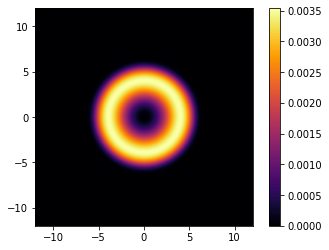

In [91]:
##plot the density
#contours = plt.contour(x, y, psi2, 1, colors='white')
#plt.clabel(contours, inline=False, fontsize=2)

plt.imshow(psi2, extent=[-12, 12, -12, 12], origin='lower',
           cmap='inferno', alpha=1)
plt.colorbar();

In [92]:
## calculate velocity field
rho = abs(psi)**2
phi = fft.fft2(psi)
cpx = fft.ifft2(1j*kx*phi)
cpy = (fft.ifft2(1j*(ky).T*(phi)))
vx = (imag(conj(psi)*cpx))/rho
vx = np.nan_to_num(vx, nan=0, posinf=0, neginf=0)
vy = (imag(conj(psi)*cpy))/rho
vy = np.nan_to_num(vy, nan=0, posinf=0, neginf=0)

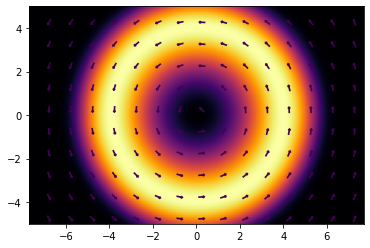

In [102]:
## plot normalized velocity field
N1=10
vxy = sqrt(vx**2+vy**2)
plt.figure()
#p1= plt.contourf(x, y, psi2,cmap='inferno', alpha=1)
p1=plt.imshow(psi2, extent=[-12, 12, -12, 12], origin='lower',cmap='inferno', alpha=1)
p1=plt.quiver(x[::N1,::N1],y[::N1,::N1], vx[::N1,::N1]/vxy[::N1,::N1], 
              vy[::N1,::N1]/vxy[::N1,::N1], vxy[::N1,::N1], pivot='mid', 
             width=.005, headwidth=2,headlength=1, headaxislength=2, minlength=4)
plt.axis('equal')
xyrange= [-5., 5., -5., 5.]
axis(xyrange)
#plt.colorbar()
plt.savefig('v1.png')
plt.show()